# Using Qiskit to help us with some Homework 
### by Abdulah Amer 

In [1]:

from qiskit.visualization import * # bloch sphere graphs, bar graphs for measurements 
from qiskit import * # important functionality like QuantumCircuit() and etc

S_simulator=Aer.backends(name='statevector_simulator')[0] # allows you to simulate states
M_simulator=Aer.backends(name='qasm_simulator')[0] # allows you to simulate measurements 


## Circuit

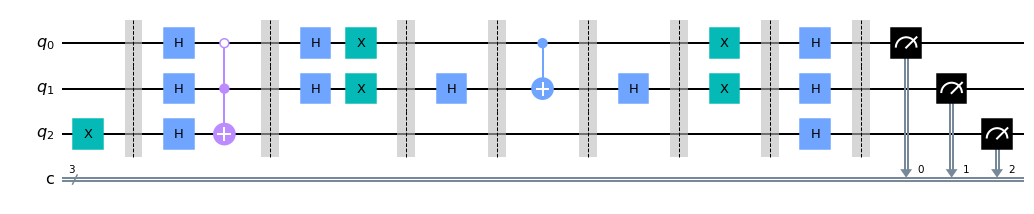

In [2]:

grover=QuantumCircuit(3,3)


# make last qubit into 1 state (all qubits start at 0)
grover.x(2)
grover.barrier()

#apply H to all gates 
grover.h(0)
grover.h(1)
grover.h(2)

#Black box 
grover.append(circuit.library.MCXGate(2, ctrl_state='10'), [0,1,2]) # new thing I learned for this tutorial 
grover.barrier()

# H and X first two qubits
grover.h(0)
grover.h(1)
grover.x(0)
grover.x(1)
grover.barrier()

# H on second qubit
grover.h(1)
grover.barrier()

# Cnot on first and second
grover.cx(0,1)
grover.barrier()

# H on second qubit
grover.h(1)
grover.barrier()

# X on first and second qubit
grover.x(0)
grover.x(1)
grover.barrier()

# H on all three 
grover.h(0)
grover.h(1)
grover.h(2)
grover.barrier()

# now measure all 
grover.measure([0,1,2], [0,1,2])

grover.draw(output='mpl')

## Results from measurement

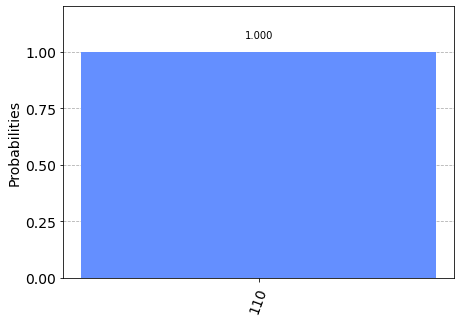

In [3]:
job=execute(grover, M_simulator)
counts=job.result().get_counts()
plot_histogram(counts)